In [32]:
%run ~/.python/init.ipynb

In [33]:
from matplotlib.lines import Line2D
import PIL
import torch
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import euclidean

In [34]:
def load_locations(paths):
    trajectories = [np.load(p)[:1000, :2] for p in sorted(paths)] # ignore last frame
    df = pd.concat([pd.DataFrame(arr, columns=['x','y']) for arr in trajectories])
    df['x'] = -df['x'] # correction 
    return df

In [35]:
# gt_root = (Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic/')
#            .glob("*coords*.npy"))
gt_root = (Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic/')
           .glob("*_prediction.npy"))
gt_trad = load_locations(gt_root)

hierarchy = (Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_hierarchy-2_predictions/').glob("*npy"))
hierarchy = load_locations(hierarchy)

autoreg = (Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_autoreg_predictions/').glob("*npy"))
autoreg = load_locations(autoreg)



In [36]:
df = pd.read_csv('./data/traffic_lights.csv')
df["kind"] = 'Traffic Light'

In [37]:
path = Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic/')
arrs = [np.load(p)[:, :2] for p in path.glob("coords*npy")]

In [38]:
def add_background(ax, legend=True):
    for idx, arr in enumerate(arrs[::2]):
        ax = sns.lineplot(x=-arr[::20,0], # plot every 20th
                          y=arr[::20,1], # plot every 20th
                          sort=False,
                          color='gray',
                          alpha=0.15,
                          lw=0.5,
                          ax=ax,
                          legend=False,
                         )
    ax = sns.scatterplot(
        x=-df['x'],
        y=df['y'],
        hue=df['kind'],
        style=df['kind'],
        ax=ax,
        s=10,
        markers={"Traffic Light": "o"},
        palette={"Traffic Light": "red"},
        legend=legend)

    
    ax.set_xlim(-410, 10)
    ax.set_ylim(-10, 350)
    ax.axis('off')
    sns.despine(ax=ax, trim=True)
    
    return ax


In [39]:
cmap = sns.color_palette("rocket_r", as_cmap=True)

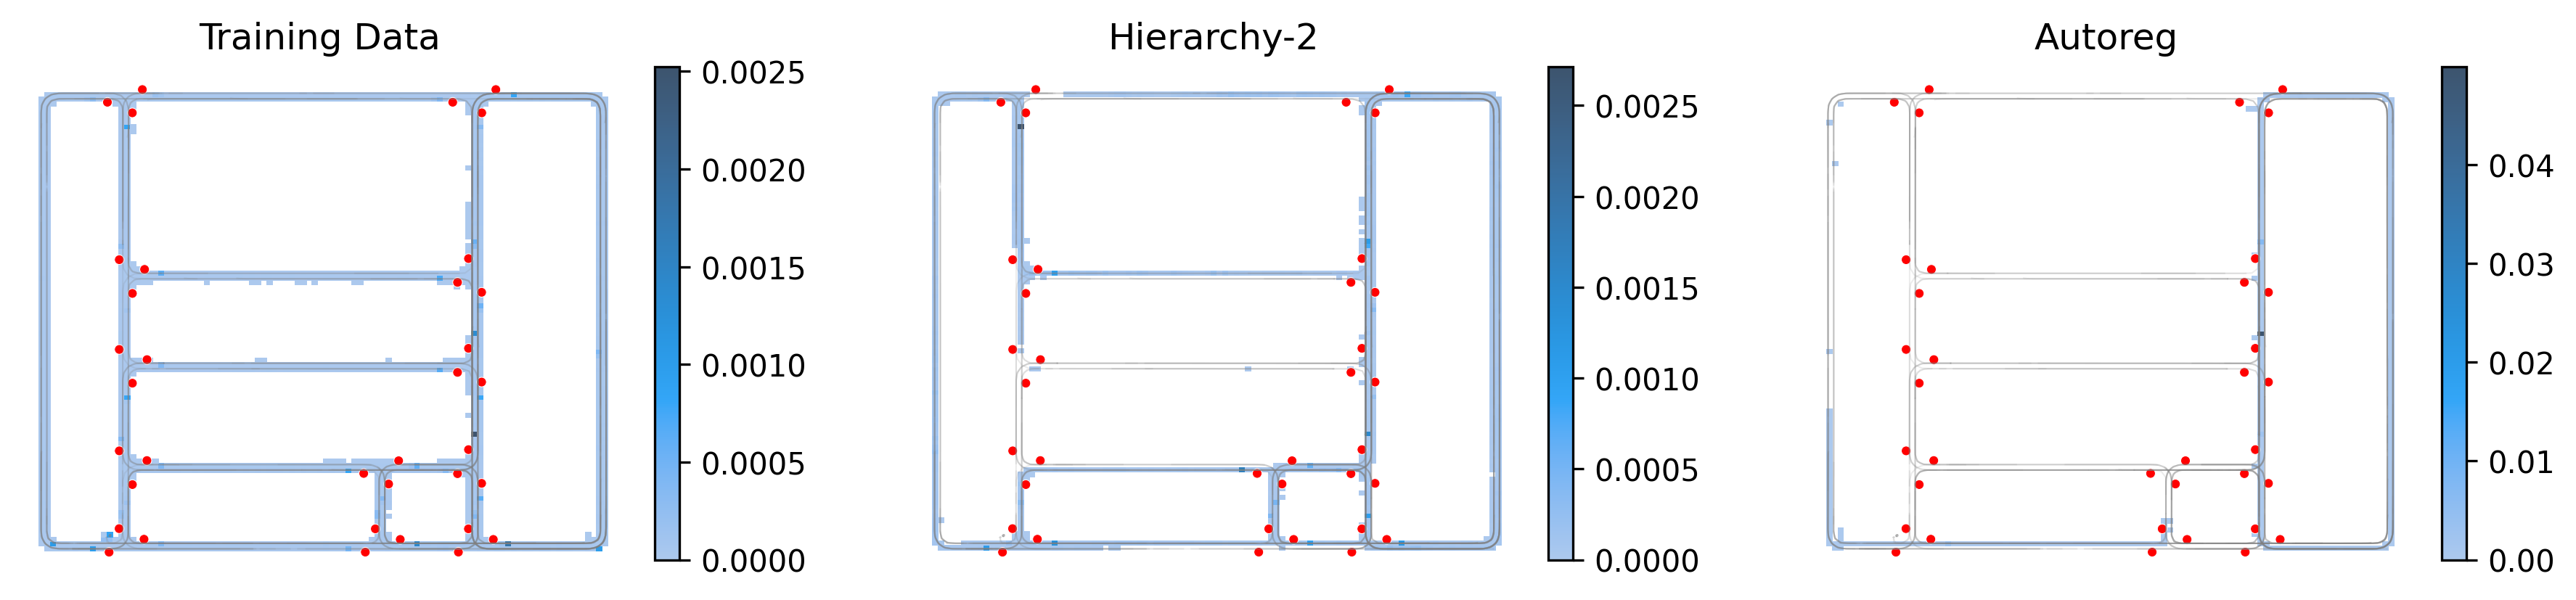

In [41]:
fig, axes = plt.subplots(1, 3, dpi=150, figsize=(15, 3))
ax1 = sns.histplot(gt_trad,
                   x="x",
                   y="y",
                   bins=100,
                   ax=axes[0],
                   cbar = True, 
                   stat='density',
#                    vmin=0, vmax=0.05
                )

ax1 = add_background(ax1, legend=False)
ax1.set_title(f"Training Data")

ax2 = sns.histplot(hierarchy,
                   x="x",
                   y="y",
                   bins=100,
                   ax=axes[1],
                   cbar = True, 
                   stat='density',
#                    vmin=0, vmax=0.05
                )

ax2.set_title(f"Hierarchy-2")
ax2 = add_background(ax2, legend=False)
# handles, labels = ax2.get_legend_handles_labels()
# ax2.legend(handles,
#            labels,
#            ncol=2,
#            loc='lower center',
#            bbox_to_anchor=(0.5, -0.05),
#            bbox_transform=plt.gcf().transFigure)


ax3 = sns.histplot(autoreg,
                   x="x",
                   y="y",
                   bins=100,
                   ax=axes[2],
                   cbar = True, 
                   stat='density',
#                    vmin=0, vmax=0.05
#                    norm=matplotlib.colors.LogNorm(), vmin=None, vmax=None
                )

ax3.set_title(f"Autoreg")
ax3 = add_background(ax3, legend=False)
plt.savefig('heatmap.pdf', bbox_inches='tight')